   63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0  67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1  67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2  37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3  41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4  56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   

   6.0  0  
0  3.0  2  
1  7.0  1  
2  3.0  0  
3  3.0  0  
4  3.0  0  


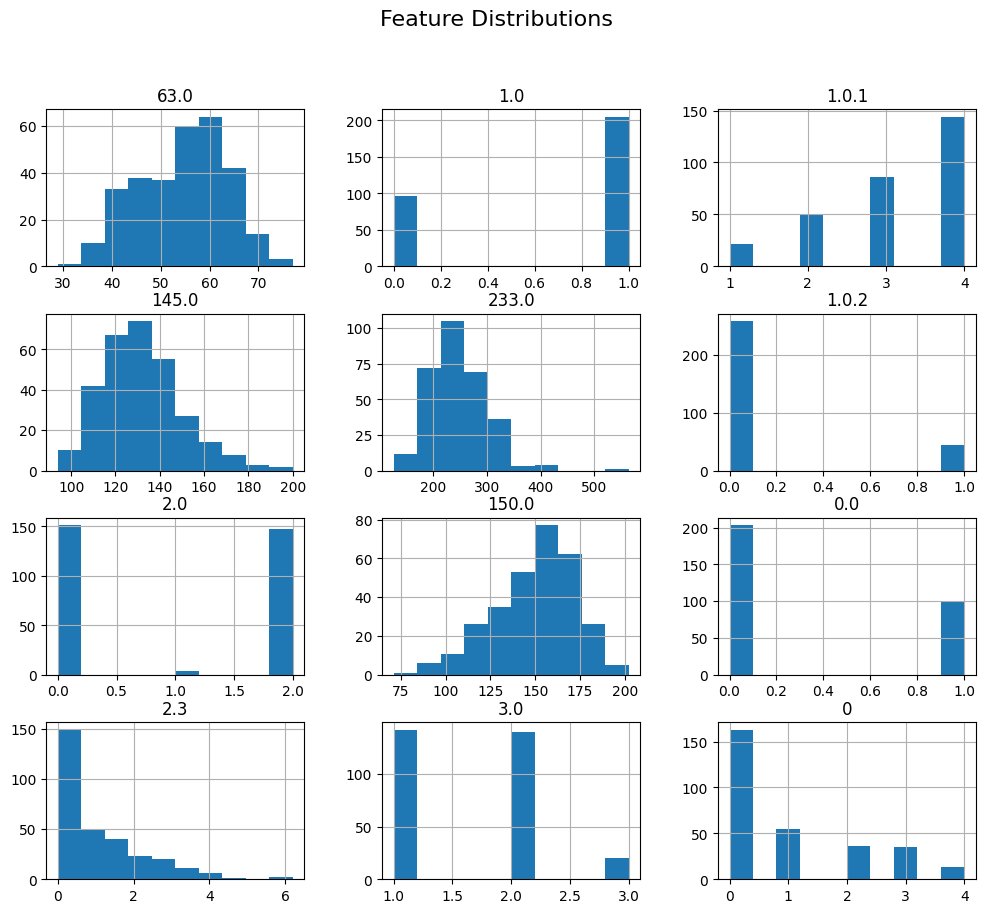

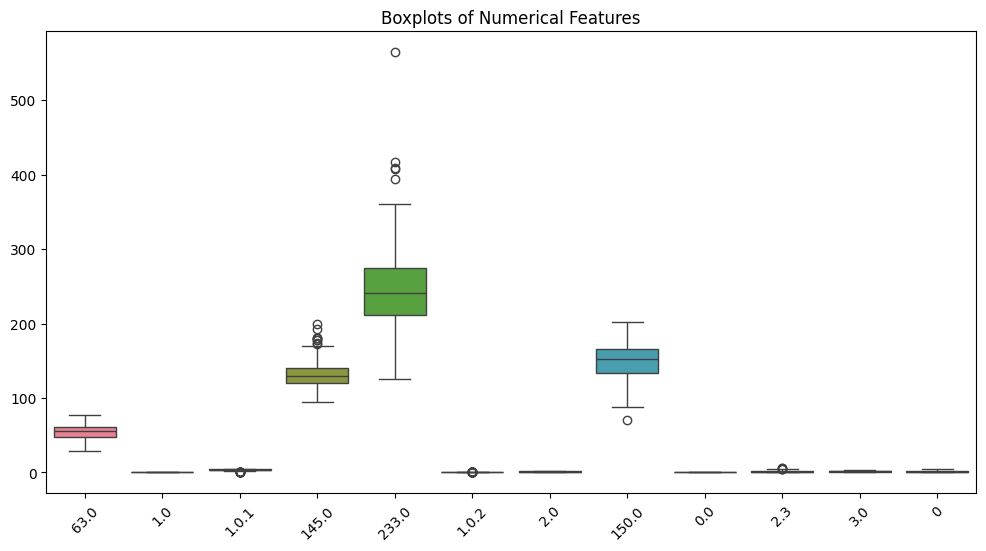

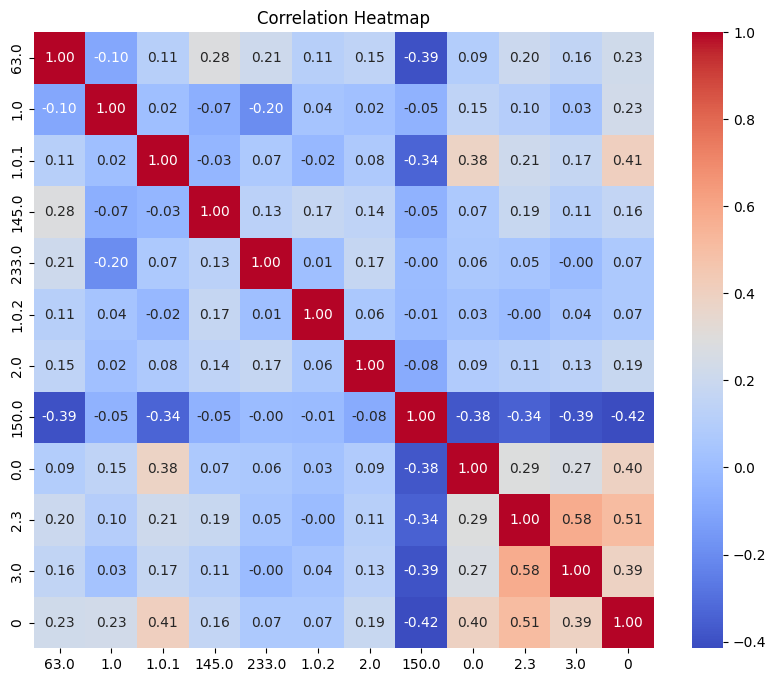

OSError: Cannot save file into a non-existent directory: 'data\processed'

In [ ]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Heart_Disease_Project\data\heart_disease.csv") 

print(df.head()) 

# df.dropna()

# Example: Fill numeric NaN with median
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Example: Fill categorical NaN with mode
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

# Histogram
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

df_scaled.to_csv("data/processed/heart_cleaned.csv", index=False)
print("Cleaned dataset saved at data/processed/heart_cleaned.csv")